# Inicialização

José Ahirton Batista Lopes Filho - TIA 71760253

Bem-vindo a primeira tarefa da parte 2 do curso de Aprendizado de Máquinas Profundo. 

Treinar uma rede neural requer a especificação de um valor inicialpara os pesos. Um processo de inicialização mais adequado irá auxiliar no aprendizado.  

Nesta tarefa iremos estudar a inicialização de uma rede neural analisando formas diferentes de inicialização e verificar os resultados obtidos.  

Uma escolha correta da inicialização deverá:
- Acelerar a convergência do gradiente descendente
- Aumentam as chances do gradiente descendente convergir para um erro menor no treinamento (e generalização)  

Para começar execute a próxima célula e carregue os pacotes necessários e os dados com que iremos trabalhar. 

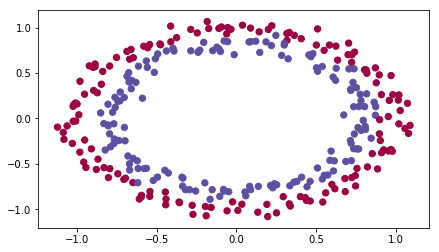

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# carrega a base de dados: pontos azul/vermelho em circulos
train_X, train_Y, test_X, test_Y = load_dataset()

Você deseja criar um classificador que separe os pontos azuis dos pontos vermelhos.

## 1 - Modelo de Rede Neural 

Para esta tarefa iremos utilizar uma rede neural com 3 camadas (já implementada para você). Aqui estão os métodos de inicialização que você irá experimentar:   
- *Inicialização com zeros* --  ajustando `initialization = "zeros"` no argumento de entrada.
- *Inicialização aleatória* -- ajustando `initialization = "random"` no argumento de entrada. Este método inicializa os pesos com valores aleatórios, porém, grandes.  
- *Inicialização "he"* -- ajustando `initialization = "he"` no argumento de entrada. Este método inicializa os pesos para valores aleatórios de acordo com o artigo He et al., 2015. 

**Instruções**: Por favor leia rapidamente o código abaixo e execute a célula. Nas próximas células você irá implementar os três processos de inicialização para este modelo. 

In [2]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implemente a rede neural em 3 camadas: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Argumentos:
    X -- dados de entrada, no formato (2, numero de exemplos)
    Y -- vetor com os valores corretos de saída (contendo 0 para pontos vermelhos; 1 para pontos azuis), no formato 
         (1, número de exemplos)
    learning_rate -- taxa de aprendizado do gradiente descendente. 
    num_iterations -- número de interações do gradiente descendente
    print_cost -- se True, imprime o custo a cada 1000 interações
    initialization -- flag para escolha do método de inicialização 
    
    Retorna:
    parameters -- parâmetros aprendidos pelo modelo
    """
        
    grads = {}
    costs = [] # para manter os valores do custo
    m = X.shape[1] # número de exemplos
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Inicializa os parâmetros do dicionário.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradiente descendente)

    for i in range(0, num_iterations):

        # Propagação para frente: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Custo
        cost = compute_loss(a3, Y)

        # Propagação para trás.
        grads = backward_propagation(X, Y, cache)
        
        # Atualização de parâmetros
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Imprime o custo a cada 1000 interações
        if print_cost and i % 1000 == 0:
            print("Custo após a interação {}: {}".format(i, cost))
            costs.append(cost)
            
    # plota o custo
    plt.plot(costs)
    plt.ylabel('custo')
    plt.xlabel('iterações (por centenas)')
    plt.title("Taxa de aprendizado =" + str(learning_rate))
    plt.show()
    
    return parameters

## 2 - Inicialização com Zeros

Existem dois tipos de parâmetros a serem inicializados em uma rede neural:
- as matrizes de peso $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- os vetores de bias $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Exercício**: Implemente a função a seguir para inicializar todos os parâmetros com zeros. Voce verá, depois, que está inicialização não funciona muito bem pois ele falha na hora que "quebrar simetrias" mas, vamos tentar usar este processo de qualquer forma e ver o que acontece. Utilize np.zeros((..,..)) com os formatos corretos.

In [3]:
# FUNÇÃO DE AVALIAÇÃO: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Argumentos:
    layer_dims -- array de python (lista) contendo o tamanho de cada camada.
    
    Retorna:
    parameters -- dicionário python contendo os parâmetros "W1", "b1", ..., "WL", "bL":
                    W1 -- matriz de pesos no formato (layers_dims[1], layers_dims[0])
                    b1 -- vetor de bias no formato (layers_dims[1], 1)
                    ...
                    WL -- matriz de pesos no formato (layers_dims[L], layers_dims[L-1])
                    bL -- vetor de bias no formato (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # número de camadas na rede
    
    for l in range(1, L):
        ### INICIE SEU CÓDIGO AQUI ### (≈ 2 linhas de código)
        
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        ### TÉRMINO DO CÓDIGO ###
    return parameters

In [4]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.  0.]]
b2 = [[ 0.]]


**Saída esperada**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 0.  0.  0.]
 [ 0.  0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[ 0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Execute o código abaixo para treinar seu modelo utilizando 15.000 interações utilizando inicialização com zeros. 

Custo após a interação 0: 0.6931471805599453
Custo após a interação 1000: 0.6931471805599453
Custo após a interação 2000: 0.6931471805599453
Custo após a interação 3000: 0.6931471805599453
Custo após a interação 4000: 0.6931471805599453
Custo após a interação 5000: 0.6931471805599453
Custo após a interação 6000: 0.6931471805599453
Custo após a interação 7000: 0.6931471805599453
Custo após a interação 8000: 0.6931471805599453
Custo após a interação 9000: 0.6931471805599453
Custo após a interação 10000: 0.6931471805599455
Custo após a interação 11000: 0.6931471805599453
Custo após a interação 12000: 0.6931471805599453
Custo após a interação 13000: 0.6931471805599453
Custo após a interação 14000: 0.6931471805599453


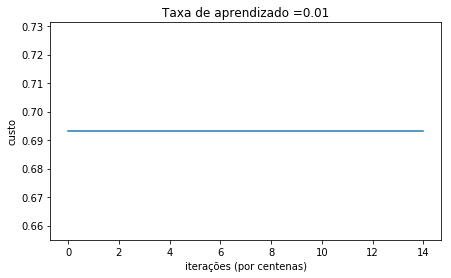

No conjunto de treinamento:
Accuracy: 0.5
No conjunto de teste:
Accuracy: 0.5


In [5]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("No conjunto de treinamento:")
predictions_train = predict(train_X, train_Y, parameters)
print ("No conjunto de teste:")
predictions_test = predict(test_X, test_Y, parameters)

O desempenho é bem ruim, e o custo não diminui. O desempenho deste modelo não é muito melhor que uma escolha aleatória. Porque? Vamos analisar os detalhes da predição e a borda de decisão: 

In [6]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


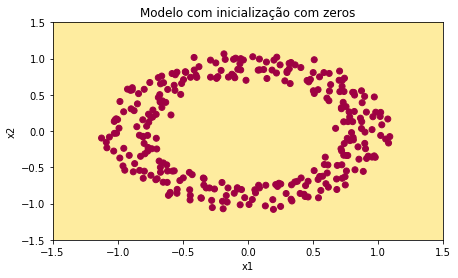

In [7]:
plt.title("Modelo com inicialização com zeros")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, predictions_train)

O modelo está fazendo uma previsão de 0 para todos os exemplos. 

Em geral, inicializar todos os pesos com zero resulta em uma rede que não consegue quebrar simetrias. Isto quer dizer que cada neurônio em cada camada irá aprender exatamente a mesma coisa, e você pode estar treinando uma rede neural com $n^{[l]}=1$ para todas as camadas, e a rede não é mais poderosa que um classificador linear como a regressão logística.  

<font color='blue'>
**O que você deve lembrar**:
- Os pesos $W^{[l]}$ devem ser inicializados aleatoriamente para quebrar a simetria. 
- Não existe problema em se inicializar os bias $b^{[l]}$ com zeros. A simetria ainda é quebrada desde que $W^{[l]}$ seja inicializado aleatoriamente. 


## 3 - Inicialização aleatória

Para quebrar a simetria da rede vamos inicializar os pesos aleatoriamente. Seguindo a inicialização aleatória, cada neurônio poderá aprender uma função diferente para suas entradas. Neste exercício, você verá o que acontece se os pesos são inicializados aleatoriamente, porém, com valores altos. 

**Exercício**: Implemente a seguinte função para inicializar os pesos para valores aleatórios altos (ajustados para \*10) e os bias com zeros. Utilize `np.random.randn(..,..) * 10` para os pesos e `np.zeros((.., ..))` para os bias. Nós estamos utilizando uma semente fixa `np.random.seed(..)` para garantir os resultados, portanto, não se preocupe em executar o código várias vezes, os valores devem ser sempre os mesmos. 

In [8]:
# FUNÇÃO DE AVALIAÇÃO: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Argumentos:
    layer_dims -- um array python (lista) contendo o tamanho de cada camada.
    
    Retorna:
    parameters -- dicionário python contendo os parâmetros "W1", "b1", ..., "WL", "bL":
                    W1 -- matriz de pesos no formato (layers_dims[1], layers_dims[0])
                    b1 -- vetor de bias no formato (layers_dims[1], 1)
                    ...
                    WL -- matriz de pesos no formato  (layers_dims[L], layers_dims[L-1])
                    bL -- vetor de bias no formato  (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # Esta semente garante que os valores aleatórios serão sempre os mesmos
    parameters = {}
    L = len(layers_dims)            # valor inteiro representando o número de camadas
    
    for l in range(1, L):
        ### INICIE O SEU CÓDIGO AQUI ### (≈ 2 linhas de código)
         
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))    
            
        ### TÉRMINO DO CÓDIGO ###

    return parameters

In [9]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


**Saída esperada**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.82741481 -6.27000677]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Execute o código abaixo para treinar o seu modelo com 15.000 interações utilizando a inicialização aleatória. 

/Users/ahirtonlopes/Desktop/Mackenzie/DeepLearning/Atividade 5/atividade1/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/ahirtonlopes/Desktop/Mackenzie/DeepLearning/Atividade 5/atividade1/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Custo após a interação 0: inf
Custo após a interação 1000: 0.6231412804228252
Custo após a interação 2000: 0.5979042996377857
Custo após a interação 3000: 0.5636379908147912
Custo após a interação 4000: 0.5501412324370814
Custo após a interação 5000: 0.5444383478011093
Custo após a interação 6000: 0.5374380799952517
Custo após a interação 7000: 0.47560831443144236
Custo após a interação 8000: 0.39780215233411886
Custo após a interação 9000: 0.39347201638372875
Custo após a interação 10000: 0.3920273055562081
Custo após a interação 11000: 0.3892727039688806
Custo após a interação 12000: 0.386161047977093
Custo após a interação 13000: 0.3849881861838211
Custo após a interação 14000: 0.3827918021864143


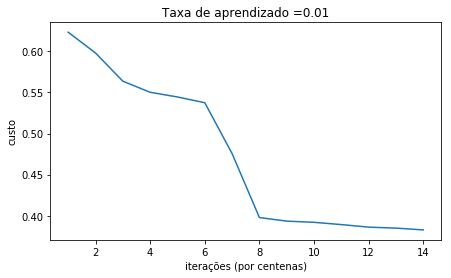

No conjunto de treinamento:
Accuracy: 0.83
No conjunto de teste:
Accuracy: 0.86


In [10]:
parameters = model(train_X, train_Y, initialization = "random")
print ("No conjunto de treinamento:")
predictions_train = predict(train_X, train_Y, parameters)
print ("No conjunto de teste:")
predictions_test = predict(test_X, test_Y, parameters)

Se você obtiver um "inf" como o custo após a interação 0, isto ocorre devido a um problema de arredondamento no python; uma implementação mais sofisticada resolveria este problema, mas isto não afeta o nosso propósito neste exercício.  

De qualquer forma, note que a simetria foi quebrada e os resultados obtidos parecem melhores que os anteriores. A saída do modelo não é mais de apenas zeros.  

In [11]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1
  1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
  0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1
  1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0
  1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
  0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
  1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
  1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
  1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


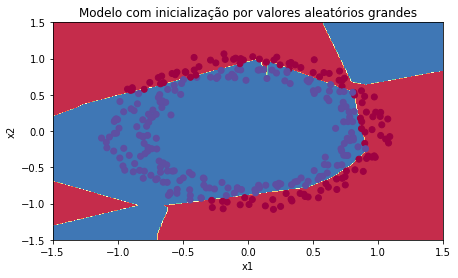

In [12]:
plt.title("Modelo com inicialização por valores aleatórios grandes")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, predictions_train)

**Observações**:
- O custo começa muito alto. Isto ocorre porque os valores aleatórios da inicialização são altos. A última ativação (sigmoid) da como saída valores muito próximos de 0 ou de 1 para alguns exemplos e quando o resultado está errado o valor da perda é grande para aquele exemplo. De fato, quando $\log(a^{[3]}) = \log(0)$, a perda vai para infinito.
- Uma inicialização ruim pode levar a gradientes que vão para zero ou que explodem fazendo com que o algoritmo de otimização seja lento.  
- Se você treinar esta rede por mais tempo você deve conseguir melhores resultados porém, a inicialização com valores aleatórios grandes desacelera o processo de aprendizado. 

<font color='blue'>
**Em Resumo**:
- Inicializar os pesos para valores aleatórios grandes não funciona muito bem. 
- Esperamos que a inicialização com valores aleatórios pequenos se comporte de uma melhor forma. A questão importante é: quão pequeno devem ser estes valores? Vamos tentar descobrir no próximo exercício.  

## 4 - Inicialização He

Finalmente, vmos experimentar a inicialização He; este nome foi escolhido por ser o nome do primeiro autor do artigo He et al., 2015. (Se você já ouviu falar da inicialização de Xavier, está é similar, exceto que na Xavier é utilizado um fator de escala para os pesos $W^{[l]}$ de `sqrt(1./layers_dims[l-1])` enquanto que na inicialização He é utilizado `sqrt(2./layers_dims[l-1])`.)

**Exercício**: Implemente a seguinte função de inicialização usando o processo de He.

**Dica**: Esta função é similar a prévia `initialize_parameters_random(...)`. A única diferença é que ao invés de multiplicar  `np.random.randn(..,..)` por 10, você irá multiplicá-los por $\sqrt{\frac{2}{\text{dimensão da camada anterior}}}$, que é o que é feito na inicialização He para as camadas com função de ativação ReLU.

In [13]:
# FUNÇÃO DE INICIALIZAÇÃO: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Argumentos:
    layer_dims -- array python (lista) contendo o tamanho de cada camada.
    
    Retorna:
    parameters -- um dicionário python contendo os parâmetros "W1", "b1", ..., "WL", "bL":
                    W1 -- matriz de pesos no formato (layers_dims[1], layers_dims[0])
                    b1 -- vetor de bias no formato (layers_dims[1], 1)
                    ...
                    WL -- matriz de pesos no formato (layers_dims[L], layers_dims[L-1])
                    bL -- vetor de bias no formato (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # valor inteiro representando o número de camadas
     
    for l in range(1, L + 1):
        ### INICIE SEU CÓDIGO AQUI ### (≈ 2 linhas de código)
       
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
        ### TÉRMINO DO CÓDIGO ###
        
    return parameters

In [14]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


**Saída esperada**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Execute a célula abaixo para treinar seu modelo com 15.000 interações utilizando a inicialização He. 

Custo após a interação 0: 0.8830537463419761
Custo após a interação 1000: 0.6879825919728063
Custo após a interação 2000: 0.6751286264523371
Custo após a interação 3000: 0.6526117768893807
Custo após a interação 4000: 0.6082958970572938
Custo após a interação 5000: 0.5304944491717495
Custo após a interação 6000: 0.4138645817071794
Custo após a interação 7000: 0.3117803464844441
Custo após a interação 8000: 0.23696215330322562
Custo após a interação 9000: 0.18597287209206836
Custo após a interação 10000: 0.1501555628037181
Custo após a interação 11000: 0.12325079292273544
Custo após a interação 12000: 0.09917746546525937
Custo após a interação 13000: 0.08457055954024276
Custo após a interação 14000: 0.07357895962677366


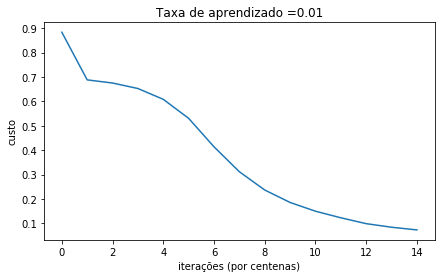

Sobre o conjunto de treinamento:
Accuracy: 0.993333333333
Sobre o conjunto de teste:
Accuracy: 0.96


In [15]:
parameters = model(train_X, train_Y, initialization = "he")
print ("Sobre o conjunto de treinamento:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Sobre o conjunto de teste:")
predictions_test = predict(test_X, test_Y, parameters)

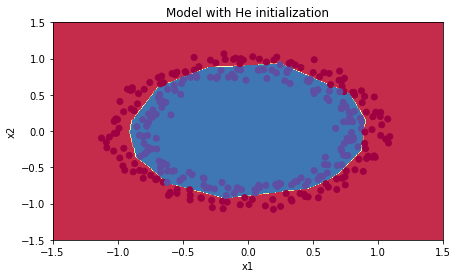

In [16]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, predictions_train)

**Observações**:
- O modelo com a inicialização He separa ospontos vermelhos dos azuis muito bem com um número pequeno de interações. 


## 5 - Conclusões

Você viu 3 formas diferentes de inicializar os parâmetros de uma rede neural. Para o mesmonúmero de interações e o mesmo conjunto de hiper-parâmetros, a comparação é a seguinte: 

<table> 
    <tr>
        <td>
        **Modelo**
        </td>
        <td>
        **Acurácia do treinamento**
        </td>
        <td>
        **Problema/Comentário**
        </td>

    </tr>
        <td>
        Rede de 3-camadas inicializada com zeros.
        </td>
        <td>
        50%
        </td>
        <td>
        falha na quebra de simetria
        </td>
    <tr>
        <td>
        Rede de 3-camadas inicializada aleatoriamente.
        </td>
        <td>
        83%
        </td>
        <td>
        pesos muito grandes 
        </td>
    </tr>
    <tr>
        <td>
        Rede de 3-camadas inicializada com o método de He
        </td>
        <td>
        99%
        </td>
        <td>
        método recomendado
        </td>
    </tr>
</table> 

<font color='blue'>
**O que você deve lembrar deste notebook**:
- Inicializações diferentes levam a resultados diferentes.
- Inicialização aleatória é utilizada para quebrar simetrias e fazer com que unidades diferentes aprendam coisas diferentes. 
- Não inicialize com valores muito grandes.
- A inicialização He funciona bem para redes com fnção de ativação ReLU.  